In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from scipy.signal import savgol_filter

# %matplotlib widget

In [30]:
def LDAP_to_time(timestamp):

    value = datetime.datetime(1601, 1, 1) + datetime.timedelta(seconds=timestamp/10000000)

    # return (value.strftime('%Y-%m-%d %H:%M:%S.%f'))
    # print(type(value))
    return value


def modifyTimestamps(df):

    df = df.dropna()
    df = df.drop(df.filter(regex='Name..').columns, axis=1)
    df = df.rename(columns={"Name": "Time"})
    df['Time'] = df['Time'].map(lambda x: LDAP_to_time(x))

    return df


def plotSimulation(df):

    U1 = np.array(df['U_L1real'])[:]
    I1 = np.array(df['I_L1real'])[:]
    time = np.array(df['Time'])[:]

    fig = plt.figure(figsize=(16, 8))
    plt.plot(time, U1)
    plt.plot(time, I1)

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S.%f'))
    plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=10))
    plt.gcf().autofmt_xdate()
    plt.show()

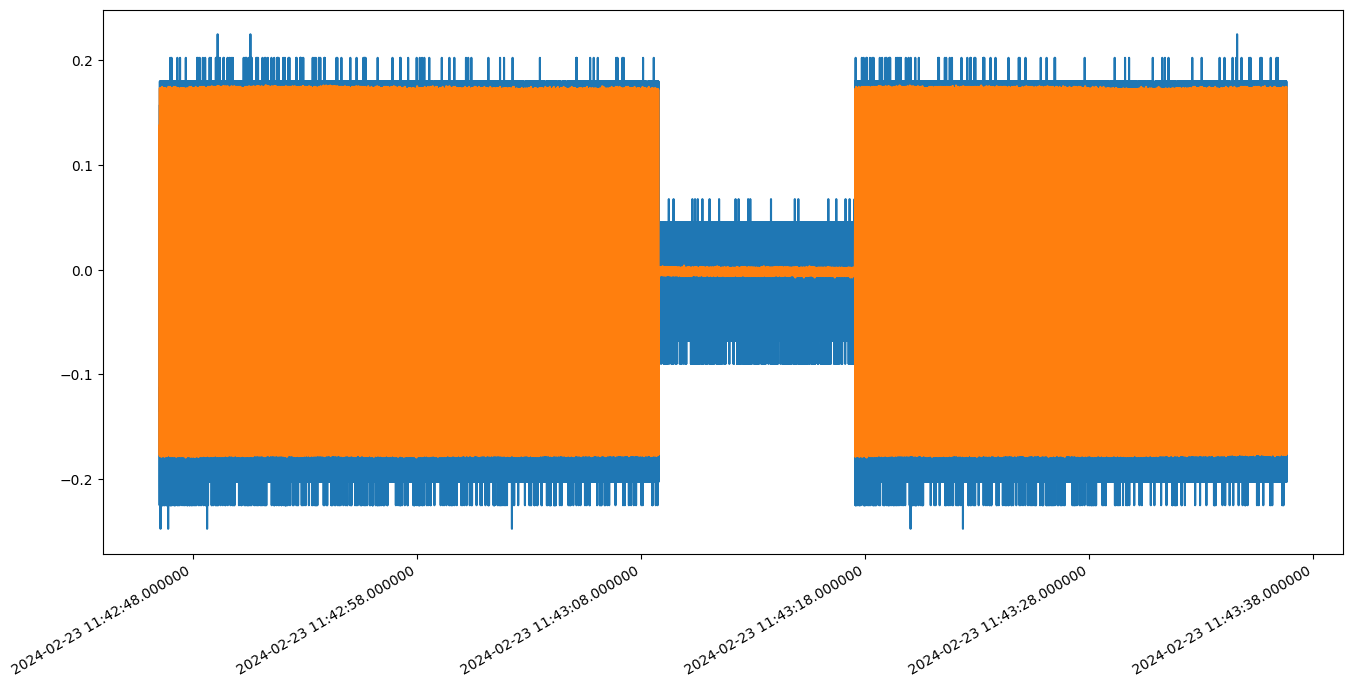

In [31]:
powerFailureDf = pd.read_csv('Simulations/Power Anomalies Simulations/01_Power_failure_10sec.csv', sep=';')
powerFailureDf = modifyTimestamps(df=powerFailureDf)

plotSimulation(df=powerFailureDf)

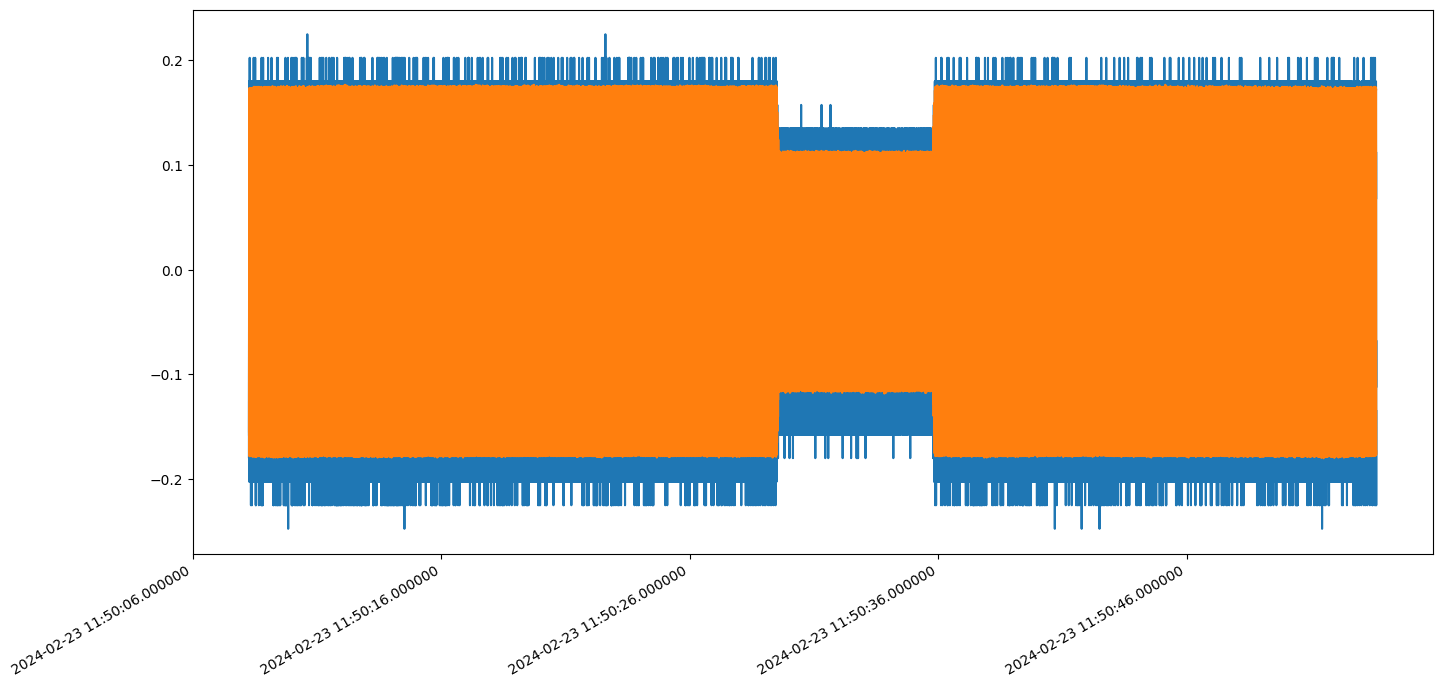

In [32]:
powerSagDf = pd.read_csv('Simulations/Power Anomalies Simulations/02_Power_sag_5sec.csv', sep=';')
powerSagDf = modifyTimestamps(df=powerSagDf)

plotSimulation(df=powerSagDf)

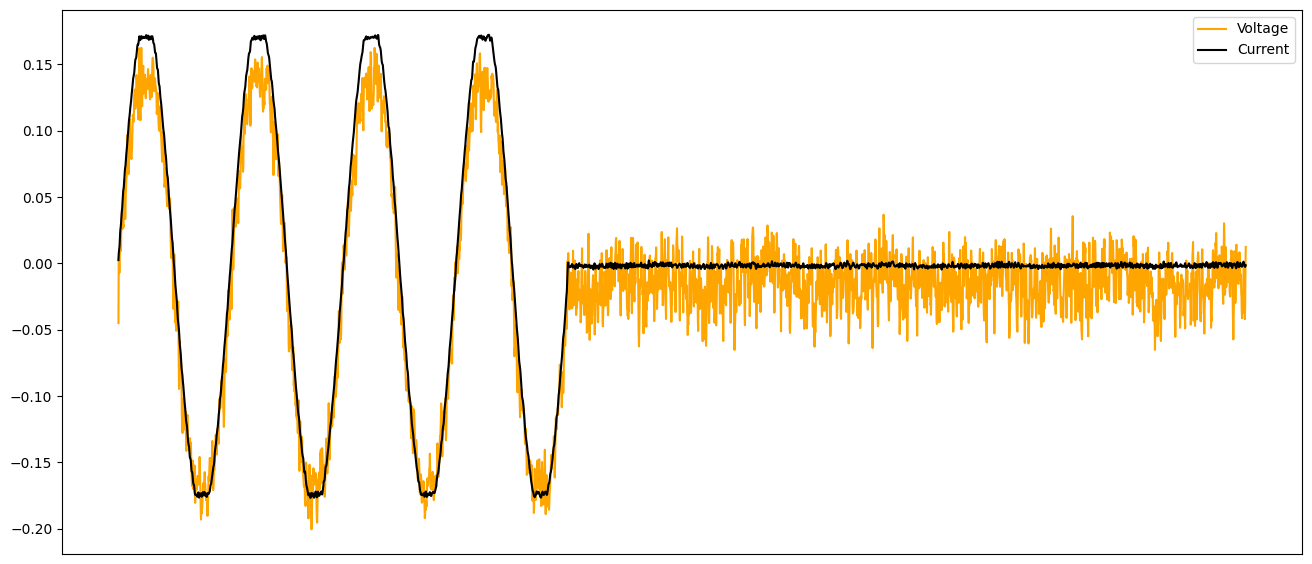

In [39]:
time_start = '2024-02-23 11:43:8.7'
time_end = '2024-02-23 11:43:8.9'

U1 = powerFailureDf[(powerFailureDf['Time'] >= time_start) & (powerFailureDf['Time'] <= time_end)]['U_L1real']
U1 = savgol_filter(x=U1, window_length=10, polyorder=5)

I1 = powerFailureDf[(powerFailureDf['Time'] >= time_start) & (powerFailureDf['Time'] <= time_end)]['I_L1real']
I1 = savgol_filter(x=I1, window_length=10, polyorder=5)

time = powerFailureDf[(powerFailureDf['Time'] >= time_start) & (powerFailureDf['Time'] <= time_end)]['Time']

# U1 = np.array(powerFailureDf['U_L1real'])
# I1 = np.array(powerFailureDf['I_L1real'])[:]
# time = np.array(powerFailureDf['Time'])[459860:469860]

fig = plt.figure(figsize=(16, 8))
plt.plot(time, U1, label='Voltage', c='orange')
plt.plot(time, I1, label='Current', c='k')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S.%f'))
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=10))
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

In [40]:
I1

array([ 0.00251601,  0.00740171,  0.00938168, ..., -0.0026573 ,
       -0.0022093 , -0.00146054])

In [35]:
powerFailureDf[powerFailureDf['Time'] == '2024-02-23 11:43:08.000000']

,Time,I_L1real,U_L1real
429860,2024-02-23 11:43:08,0.002688,0.0
